# Capstone Project
## TED Talk
#### Author: Diogo Viana

#### Contact: d.cviana@outlook.com
####                 https://www.linkedin.com/in/diogo-viana/

#### BrainStation - Data Science Diploma - 2022

# Table of Contents
1. [Introduction](#Introduction)
2. [Data Dictionary](#Data-Dictionary)
3. [Data Cleaning](#Data-Cleaning)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
5. [Conclusion](#Conclusion)

### Introduction

TED is a non-profit organization created with the intention to share ideas by having regular people talking about powerful subjects. The videos have an average length of 18 minutes or less.

Even though TED is a non-profit organization, it makes money through conference attendance fees, sponsorships, foundation support, licensing fees and book sales, and they invest it right away editing the videos and in web development for example.

In this notebook you will find the data clean and exploratory data analysis. During the process of data cleaning, I first started by renaming the columns to facilitate the reading process. After that I checked for duplicates, data types and missing data. Even though no duplicates were found, I needed to deal with a great deal of missing data.

In the EDA part, I investigated the titles of the most popular TED talks based on number of views and likes. I also found out that the year of 2019 and 2018 were the years with most of the TED talks published since 2006. In relation to correlation between columns, I needed to drop some of them because it presented high correlation.

Therefore, by the end of the notebook, I provided a brief conclusion and the instructions on how to find the next notebook with the modeling part. 

### Data Dictionary

Please, take a moment to read and understand the data dictionary below. This will be a useful reference if we are ever confused about what a particular column of data means.

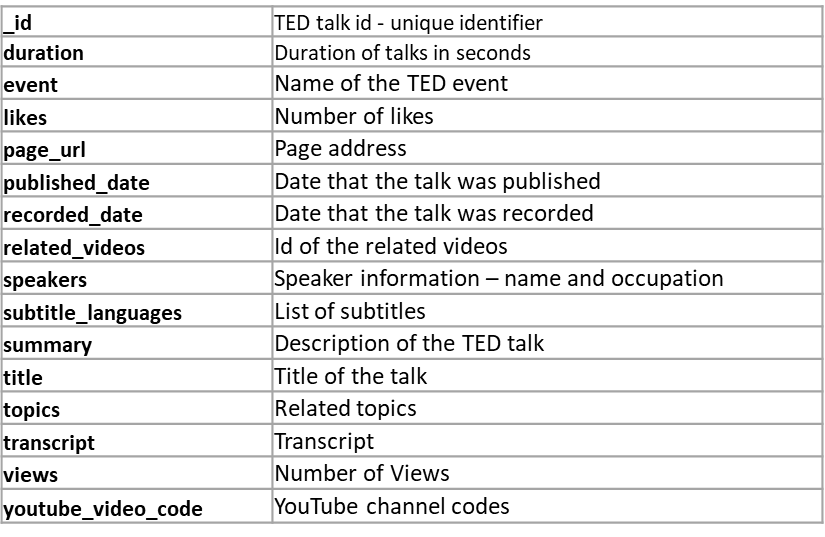

### Data Cleaning

The data with the information from TED talk provides a snapshot of the videos with the necessary information to work on some predictions. First, I need to read the data and inspect what I am working with, and assess the level of cleaning and preprocessing that needs to be done

In [1]:
# tools from the toolshed

import pandas as pd
pd.options.display.max_columns=None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsTransformer
from sklearn.tree import DecisionTreeClassifier
from statsmodels.regression import linear_model

from sklearn.decomposition import PCA

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.pipeline import Pipeline

from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report


import json as json


import plotly.express as px

import statsmodels.api as sm


from scipy import stats
from scipy.stats import norm


import time

np.random.seed(12345)
import warnings
warnings.filterwarnings('ignore')

First, let us read in the data and profile what we are working with!

In [2]:
# Read in the csv
df = pd.read_csv('talks_info.csv')

After I have read the data, I am able to start profiling it.

In [3]:
df.head(1)

,_id,duration,event,likes,page_url,published_date,recorded_date,related_videos,speakers,subtitle_languages,summary,title,topics,transcript,views,youtube_video_code
0,21,992,TED2006,17K,https://www.ted.com/talks/mena_trott_meet_the_...,2006-08-25T00:11:00Z,2006-02-23,"[""144"",""1282"",""1379"",""87"",""2302"",""2638""]","[{""name"":""Mena Trott"",""occupation"":""Blogger; c...","[{""name"":""English"",""code"":""en""},{""name"":""Vietn...","The founding mother of the blog revolution, Mo...",Meet the founder of the blog revolution,"[{""id"":""4"",""name"":""culture""},{""id"":""13"",""name""...","Over the past couple of days, as I've been pre...",589115,RlBTxuWCuL8


It looks like the '_id' is an unique identifier which I will check later.

In the next line I will rename some of the columns to make it more understandable.

In [4]:
df.columns = ['event_id', 'duration', 'ted_event', 'likes', 'page_url', 'published_date', 'recorded_date', 'related_videos', 'speaker_information', 'subtitle_languages', 'description', 'title', 'topics', 'transcript', 'views', 'youtube_video_code']

In [5]:
# Checking new columns name

df.head(1)

,event_id,duration,ted_event,likes,page_url,published_date,recorded_date,related_videos,speaker_information,subtitle_languages,description,title,topics,transcript,views,youtube_video_code
0,21,992,TED2006,17K,https://www.ted.com/talks/mena_trott_meet_the_...,2006-08-25T00:11:00Z,2006-02-23,"[""144"",""1282"",""1379"",""87"",""2302"",""2638""]","[{""name"":""Mena Trott"",""occupation"":""Blogger; c...","[{""name"":""English"",""code"":""en""},{""name"":""Vietn...","The founding mother of the blog revolution, Mo...",Meet the founder of the blog revolution,"[{""id"":""4"",""name"":""culture""},{""id"":""13"",""name""...","Over the past couple of days, as I've been pre...",589115,RlBTxuWCuL8


##### Profiling

In [6]:
# what is the shape of the dataframe?
df.shape

(5631, 16)

Therefore, for this dataset, I have 5631 rows of data and 16 variables for each row. It looks like a good size of dataset to work with.

##### Next steps:
- Check for duplicated data
- Check data types and formats
- Check for missing data

**Step 1**
- Check for duplicated data

In [7]:
# Checking for duplicates.

df.duplicated().sum()

0

No duplicate values were found in the dataset.

**Step 2**
- Data-types and formats

In [8]:
df.head(3)

,event_id,duration,ted_event,likes,page_url,published_date,recorded_date,related_videos,speaker_information,subtitle_languages,description,title,topics,transcript,views,youtube_video_code
0,21,992,TED2006,17K,https://www.ted.com/talks/mena_trott_meet_the_...,2006-08-25T00:11:00Z,2006-02-23,"[""144"",""1282"",""1379"",""87"",""2302"",""2638""]","[{""name"":""Mena Trott"",""occupation"":""Blogger; c...","[{""name"":""English"",""code"":""en""},{""name"":""Vietn...","The founding mother of the blog revolution, Mo...",Meet the founder of the blog revolution,"[{""id"":""4"",""name"":""culture""},{""id"":""13"",""name""...","Over the past couple of days, as I've been pre...",589115,RlBTxuWCuL8
1,1,957,TED2006,110K,https://www.ted.com/talks/al_gore_averting_the...,2006-06-27T00:11:00Z,2006-02-25,"[""243"",""547"",""2093"",""74405"",""64693"",""83767""]","[{""name"":""Al Gore"",""occupation"":""Climate advoc...","[{""name"":""Greek"",""code"":""el""},{""name"":""Gujarat...",With the same humor and humanity he exuded in ...,Averting the climate crisis,"[{""id"":""3"",""name"":""climate change""},{""id"":""4"",...","Thank you so much, Chris. And it's truly a gre...",3671801,rDiGYuQicpA
2,7,1266,TED2006,60K,https://www.ted.com/talks/david_pogue_simplici...,2006-06-27T00:11:00Z,2006-02-24,"[""1725"",""2274"",""172"",""2664"",""2464"",""1268""]","[{""name"":""David Pogue"",""occupation"":""Technolog...","[{""name"":""Greek"",""code"":""el""},{""name"":""English...",New York Times columnist David Pogue takes aim...,Simplicity sells,"[{""id"":""10"",""name"":""technology""},{""id"":""36"",""n...","(Music: ""The Sound of Silence,"" Simon &amp; Ga...",2008487,NEjZt0y6OOw


In [9]:
# Check using .dtypes

df.dtypes

event_id                int64
duration                int64
ted_event              object
likes                  object
page_url               object
published_date         object
recorded_date          object
related_videos         object
speaker_information    object
subtitle_languages     object
description            object
title                  object
topics                 object
transcript             object
views                   int64
youtube_video_code     object
dtype: object

As could be observed from above, the data contains a variety of both string and numeric data types for the different variables. Further on this project, I look deep into these variables to see if it is possible to convert them.

Another important observation is that the `published_date` and `recorded_date` are not in date time format and `number of likes` is not int64.

In [10]:
# Changing column 'published_date' to datetime format

df["published_date"]= pd.to_datetime(df["published_date"])

In [11]:
# Changing column 'recorded_date' to datetime format

df["recorded_date"]= pd.to_datetime(df["recorded_date"])

Checking if the columns 'published_date' and 'recorded_date' are now in datetime format. The next line confirmed that the format has changed.

In [12]:
df.dtypes

event_id                             int64
duration                             int64
ted_event                           object
likes                               object
page_url                            object
published_date         datetime64[ns, UTC]
recorded_date               datetime64[ns]
related_videos                      object
speaker_information                 object
subtitle_languages                  object
description                         object
title                               object
topics                              object
transcript                          object
views                                int64
youtube_video_code                  object
dtype: object

As we could observe, the number of likes was supposed to be int64, but it is in object type.

I will address this issue, but first I will take a look in this column to understand better.

In [13]:
df['likes']

0        17K
1       110K
2        60K
3        80K
4        14K
        ... 
5626    5.8K
5627     10K
5628     12K
5629    7.2K
5630    4.5K
Name: likes, Length: 5631, dtype: object

As we could see, the column 'likes' contains the letter `K` for thousands and `M` for million. So, I will remove this letter and then multiply `K` by `1,000` and `M` by `1,000,000`. 

In [14]:
df['likes'] = df['likes'].replace({'K':'*1e3', 'M':'*1e6'}, regex=True).map(pd.eval).astype(int)

In [15]:
# Checking if the above function worked
df['likes']

0        17000
1       110000
2        60000
3        80000
4        14000
         ...  
5626      5800
5627     10000
5628     12000
5629      7200
5630      4500
Name: likes, Length: 5631, dtype: int32

I will come back to the categorical columns later.

**Step 3**
- Check for missing data

In [16]:
# Summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5631 entries, 0 to 5630
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   event_id             5631 non-null   int64              
 1   duration             5631 non-null   int64              
 2   ted_event            5630 non-null   object             
 3   likes                5631 non-null   int32              
 4   page_url             5631 non-null   object             
 5   published_date       5631 non-null   datetime64[ns, UTC]
 6   recorded_date        5629 non-null   datetime64[ns]     
 7   related_videos       5631 non-null   object             
 8   speaker_information  5631 non-null   object             
 9   subtitle_languages   5631 non-null   object             
 10  description          5631 non-null   object             
 11  title                5631 non-null   object             
 12  topics              

As observed before, there is a mixture of numeric and string variables. Notably, looking at the non-null count, it is possible to see that there are missing values in the dataset.

I will check how many.

In [17]:
df.isnull().sum()

event_id                 0
duration                 0
ted_event                1
likes                    0
page_url                 0
published_date           0
recorded_date            2
related_videos           0
speaker_information      0
subtitle_languages       0
description              0
title                    0
topics                   0
transcript             648
views                    0
youtube_video_code     169
dtype: int64

As it could be observed:

    - te_event -> 1 missing value
    - recorded_date -> 2 missing values
    - transcript -> 648 missing values
    - youtube_video_code -> 169 missing values

I will drop the column 'youtube_video_code'. This column does not have useful information for this analysis.

In [18]:
df.drop('youtube_video_code', axis=1, inplace=True)

In [19]:
# Checking if the drop worked

df.head(1)

,event_id,duration,ted_event,likes,page_url,published_date,recorded_date,related_videos,speaker_information,subtitle_languages,description,title,topics,transcript,views
0,21,992,TED2006,17000,https://www.ted.com/talks/mena_trott_meet_the_...,2006-08-25 00:11:00+00:00,2006-02-23,"[""144"",""1282"",""1379"",""87"",""2302"",""2638""]","[{""name"":""Mena Trott"",""occupation"":""Blogger; c...","[{""name"":""English"",""code"":""en""},{""name"":""Vietn...","The founding mother of the blog revolution, Mo...",Meet the founder of the blog revolution,"[{""id"":""4"",""name"":""culture""},{""id"":""13"",""name""...","Over the past couple of days, as I've been pre...",589115


In [20]:
df[df['ted_event'].isnull()]

,event_id,duration,ted_event,likes,page_url,published_date,recorded_date,related_videos,speaker_information,subtitle_languages,description,title,topics,transcript,views
5614,94839,223,NaN,238,https://www.ted.com/talks/countdown_how_dilemm...,2022-07-08 16:15:03+00:00,2022-06-16,"[""83259"",""94157"",""86064""]","[{""name"":""Countdown"",""occupation"":""""}]","[{""name"":""English"",""code"":""en""}]","Throughout the world, we find ourselves faced ...","How ""dilemma thinking"" transforms argument int...","[{""id"":""3"",""name"":""climate change""},{""id"":""5"",...","Throughout the world, we find ourselves faced ...",7949


As we saw on the column `ted_event` has one missing value. So, I went to the Ted talk website and could not find this information.

Therefore, I will do this one row.

In [21]:
df = df.dropna(subset = ['ted_event'])

In [22]:
# Double checking the function above

df.isnull().sum()

event_id                 0
duration                 0
ted_event                0
likes                    0
page_url                 0
published_date           0
recorded_date            2
related_videos           0
speaker_information      0
subtitle_languages       0
description              0
title                    0
topics                   0
transcript             648
views                    0
dtype: int64

In [23]:
df[df['recorded_date'].isnull()]

,event_id,duration,ted_event,likes,page_url,published_date,recorded_date,related_videos,speaker_information,subtitle_languages,description,title,topics,transcript,views
4707,65384,106,TED2020,5800,https://www.ted.com/talks/debbie_millman_love_...,2020-07-24 20:02:00+00:00,NaT,"[""57734"",""57916"",""1603"",""1983"",""4062"",""431""]","[{""name"":""Debbie Millman"",""occupation"":""Design...",[],"In a series of visual, animated love letters, ...",Love letters to what we hold dear,"[{""id"":""73"",""name"":""love""},{""id"":""85"",""name"":""...",NaN,195922
4709,65233,125,Sleeping with Science,1800,https://www.ted.com/talks/beautyrest_innovatio...,2020-07-29 13:48:24+00:00,NaT,"[""65060"",""41105"",""61900""]","[{""name"":""TED Ideas Studio"",""occupation"":""""}]","[{""name"":""Portuguese, Brazilian"",""code"":""pt-br""}]",The way we sleep is constantly evolving -- fro...,Innovations in sleep,"[{""id"":""8"",""name"":""science""},{""id"":""81"",""name""...",NaN,61713


I went to the web site and did not find the information about the `recorded date`. However, since I have the `published date`, I will add the same date for `recorded_date` just for filling the blank space.

In [24]:
df.loc[df["event_id"] ==65384, "recorded_date"] = "2020-07-24"

df.loc[df["event_id"] ==65233, "recorded_date"] = "2020-07-24"

In [25]:
# Checking if the above fuction worked

df[df['recorded_date'].isnull()]

,event_id,duration,ted_event,likes,page_url,published_date,recorded_date,related_videos,speaker_information,subtitle_languages,description,title,topics,transcript,views


Now I will check the transcripts missing values

In [26]:
# Double checking the function above

df.isnull().sum()

event_id                 0
duration                 0
ted_event                0
likes                    0
page_url                 0
published_date           0
recorded_date            0
related_videos           0
speaker_information      0
subtitle_languages       0
description              0
title                    0
topics                   0
transcript             648
views                    0
dtype: int64

In [27]:
# Checking the percentage of missing values

df.isna().sum() / df.shape[0]*100.0

event_id                0.000000
duration                0.000000
ted_event               0.000000
likes                   0.000000
page_url                0.000000
published_date          0.000000
recorded_date           0.000000
related_videos          0.000000
speaker_information     0.000000
subtitle_languages      0.000000
description             0.000000
title                   0.000000
topics                  0.000000
transcript             11.509769
views                   0.000000
dtype: float64

As we could see, 11% of the column `transcript` is missing.

In [28]:
df[df['transcript'].isnull()]

,event_id,duration,ted_event,likes,page_url,published_date,recorded_date,related_videos,speaker_information,subtitle_languages,description,title,topics,transcript,views
69,24,811,TED2005,132000,https://www.ted.com/talks/pilobolus_a_dance_of...,2007-02-09 00:11:00+00:00,2005-02-25,"[""40"",""188"",""60"",""2790"",""1440"",""786""]","[{""name"":""Pilobolus"",""occupation"":""Dance compa...",[],"Two Pilobolus dancers perform ""Symbiosis."" Doe...","A dance of ""Symbiosis""","[{""id"":""8"",""name"":""science""},{""id"":""37"",""name""...",NaN,4429521
110,169,286,TEDGlobal 2007,18000,https://www.ted.com/talks/vusi_mahlasela_woza,2007-08-21 11:24:00+00:00,2007-06-08,"[""158"",""188"",""265"",""1994"",""1782"",""81988""]","[{""name"":""Vusi Mahlasela"",""occupation"":""Musici...",[],After Vusi Mahlasela's 3-song set at TEDGlobal...,"""Woza""","[{""id"":""37"",""name"":""entertainment""},{""id"":""40""...",NaN,610382
130,138,200,TED2006,13000,https://www.ted.com/talks/ethel_a_string_quart...,2007-06-18 16:29:00+00:00,2006-02-02,"[""103"",""117"",""218"",""246"",""1298"",""883""]","[{""name"":""Ethel"",""occupation"":""String quartet""}]",[],The avant-garde string quartet Ethel performs ...,"A string quartet plays ""Blue Room""","[{""id"":""4"",""name"":""culture""},{""id"":""37"",""name""...",NaN,436802
209,186,406,TEDGlobal 2007,9500,https://www.ted.com/talks/rokia_traore_m_bifo,2008-03-27 01:18:00+00:00,2007-06-06,"[""265"",""298"",""158"",""883"",""1240"",""246""]","[{""name"":""Rokia Traore"",""occupation"":""Singer-s...",[],"Rokia Traore sings the moving ""M'Bifo,"" accomp...","""M'Bifo""","[{""id"":""37"",""name"":""entertainment""},{""id"":""40""...",NaN,319887
243,290,167,TED2008,7100,https://www.ted.com/talks/sxip_shirey_rachelle...,2008-06-30 01:00:00+00:00,2008-02-12,"[""115"",""218"",""431"",""1083"",""2147"",""1464""]","[{""name"":""Sxip Shirey"",""occupation"":""Musician""...",[],Composer Sxip Shirey makes music from the simp...,"A performance with breath, music, passion","[{""id"":""37"",""name"":""entertainment""},{""id"":""40""...",NaN,239178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5519,90833,3185,TED2022,367000,https://www.ted.com/talks/elon_musk_elon_musk_...,2022-04-15 15:42:59+00:00,2022-04-10,"[""91078"",""14615"",""2774"",""236"",""1671"",""125""]","[{""name"":""Elon Musk"",""occupation"":""Serial entr...",[],"In this live, unedited conversation, Elon Musk...","Elon Musk talks Twitter, Tesla and how his bra...","[{""id"":""36"",""name"":""computers""},{""id"":""80"",""na...",NaN,12266610
5533,90834,962,TEDWomen 2021,8400,https://www.ted.com/talks/michele_lamont_how_t...,2022-04-29 14:46:18+00:00,2021-12-01,"[""81477"",""74155"",""2629"",""1253"",""1877"",""1189""]","[{""name"":""Michèle Lamont"",""occupation"":""Sociol...",[],"How do we define worth in society, and who get...",How to heal a divided world,"[{""id"":""4"",""name"":""culture""},{""id"":""55"",""name""...",NaN,281292
5540,90637,887,TEDxEastVan,882,https://www.ted.com/talks/tima_kurdi_how_one_p...,2022-05-05 16:00:53+00:00,2016-04-23,"[""91495"",""2353"",""89264"",""2110"",""24354"",""2449""]","[{""name"":""Tima Kurdi"",""occupation"":""Refugee ad...",[],"""It took only one picture -- the picture of th...",How one photo captured a humanitarian crisis,"[{""id"":""6"",""name"":""global issues""},{""id"":""106""...",NaN,29411
5570,93352,3767,TED Membership,25000,https://www.ted.com/talks/mary_ziegler_loretta...,2022-05-27 15:05:58+00:00,2022-05-19,"[""84912"",""80405"",""24411"",""65393"",""23864"",""2254""]","[{""name"":""Mary Ziegler"",""occupation"":""Legal hi...",[],The recent leak of the US Supreme Court's draf...,The future of US reproductive rights after Roe...,"[{""id"":""55"",""name"":""social change""},{""id"":""81""...",NaN,844267


I will drop the transcript column because in this analysis, I am going to predict the number of views based on the description of the talk. Therefore, `transcript` does not affect the results.

In [29]:
df.drop('transcript', axis=1, inplace=True)

In [30]:
# Double checking the function above

df.isnull().sum()

event_id               0
duration               0
ted_event              0
likes                  0
page_url               0
published_date         0
recorded_date          0
related_videos         0
speaker_information    0
subtitle_languages     0
description            0
title                  0
topics                 0
views                  0
dtype: int64

Now that I do not have any missing value I will continue cleaning the data.

In [31]:
df.head(2)

,event_id,duration,ted_event,likes,page_url,published_date,recorded_date,related_videos,speaker_information,subtitle_languages,description,title,topics,views
0,21,992,TED2006,17000,https://www.ted.com/talks/mena_trott_meet_the_...,2006-08-25 00:11:00+00:00,2006-02-23,"[""144"",""1282"",""1379"",""87"",""2302"",""2638""]","[{""name"":""Mena Trott"",""occupation"":""Blogger; c...","[{""name"":""English"",""code"":""en""},{""name"":""Vietn...","The founding mother of the blog revolution, Mo...",Meet the founder of the blog revolution,"[{""id"":""4"",""name"":""culture""},{""id"":""13"",""name""...",589115
1,1,957,TED2006,110000,https://www.ted.com/talks/al_gore_averting_the...,2006-06-27 00:11:00+00:00,2006-02-25,"[""243"",""547"",""2093"",""74405"",""64693"",""83767""]","[{""name"":""Al Gore"",""occupation"":""Climate advoc...","[{""name"":""Greek"",""code"":""el""},{""name"":""Gujarat...",With the same humor and humanity he exuded in ...,Averting the climate crisis,"[{""id"":""3"",""name"":""climate change""},{""id"":""4"",...",3671801


Now I will check which categorical column I am able to turn into numerical:

I will display all the categorical columns:

In [32]:
df.dtypes

event_id                             int64
duration                             int64
ted_event                           object
likes                                int32
page_url                            object
published_date         datetime64[ns, UTC]
recorded_date               datetime64[ns]
related_videos                      object
speaker_information                 object
subtitle_languages                  object
description                         object
title                               object
topics                              object
views                                int64
dtype: object

There are `10` non-numeic columns:
- ted_event    
- page_url
- published_date
- recorded_date
- related_videos
- speaker_information
- subtitle_languages
- description
- title                                                               
- topics

I will start with the columns `published_date` and `recorded_date`. I will extract the month and year for each column. And then drop both `published_month` and `published_year`.

In [33]:
# Adding two news columns with month and year from the published_date column

df['recorded_month'] = pd.DatetimeIndex(df['recorded_date']).month

df['recorded_year'] = pd.DatetimeIndex(df['recorded_date']).year

df['published_month'] = pd.DatetimeIndex(df['published_date']).month

df['published_year'] = pd.DatetimeIndex(df['published_date']).year

In [34]:
# Checking if year and month were added

df.head(1)

,event_id,duration,ted_event,likes,page_url,published_date,recorded_date,related_videos,speaker_information,subtitle_languages,description,title,topics,views,recorded_month,recorded_year,published_month,published_year
0,21,992,TED2006,17000,https://www.ted.com/talks/mena_trott_meet_the_...,2006-08-25 00:11:00+00:00,2006-02-23,"[""144"",""1282"",""1379"",""87"",""2302"",""2638""]","[{""name"":""Mena Trott"",""occupation"":""Blogger; c...","[{""name"":""English"",""code"":""en""},{""name"":""Vietn...","The founding mother of the blog revolution, Mo...",Meet the founder of the blog revolution,"[{""id"":""4"",""name"":""culture""},{""id"":""13"",""name""...",589115,2,2006,8,2006


In [35]:
# droping published_month and published_year

df.drop('recorded_date', axis=1, inplace=True)

df.drop('published_date', axis=1, inplace=True)

In [36]:
# Checking drop function

df.head(1)

,event_id,duration,ted_event,likes,page_url,related_videos,speaker_information,subtitle_languages,description,title,topics,views,recorded_month,recorded_year,published_month,published_year
0,21,992,TED2006,17000,https://www.ted.com/talks/mena_trott_meet_the_...,"[""144"",""1282"",""1379"",""87"",""2302"",""2638""]","[{""name"":""Mena Trott"",""occupation"":""Blogger; c...","[{""name"":""English"",""code"":""en""},{""name"":""Vietn...","The founding mother of the blog revolution, Mo...",Meet the founder of the blog revolution,"[{""id"":""4"",""name"":""culture""},{""id"":""13"",""name""...",589115,2,2006,8,2006


In [37]:
df.dtypes

event_id                int64
duration                int64
ted_event              object
likes                   int32
page_url               object
related_videos         object
speaker_information    object
subtitle_languages     object
description            object
title                  object
topics                 object
views                   int64
recorded_month          int64
recorded_year           int64
published_month         int64
published_year          int64
dtype: object

Now I will take a look in the `related_videos`

In [38]:
df['related_videos']

0              ["144","1282","1379","87","2302","2638"]
1          ["243","547","2093","74405","64693","83767"]
2            ["1725","2274","172","2664","2464","1268"]
3            ["2237","701","1095","1386","76211","242"]
4           ["2228","1476","800","2890","45233","2694"]
                             ...                       
5626                          ["79294","24262","84056"]
5627     ["83539","46386","52190","1667","1710","2050"]
5628        ["72994","73025","91371","563","68","1226"]
5629      ["51538","83537","258","10193","52269","866"]
5630    ["84954","89893","91980","2107","1429","66946"]
Name: related_videos, Length: 5630, dtype: object

In [39]:
# I will split it and then use the length function:

df['count_related_videos'] = df['related_videos'].str.split(",").str.len()

In [40]:
# Checking if it worked

df['count_related_videos']

0       6
1       6
2       6
3       6
4       6
       ..
5626    3
5627    6
5628    6
5629    6
5630    6
Name: count_related_videos, Length: 5630, dtype: int64

In [41]:
df.head(2)

,event_id,duration,ted_event,likes,page_url,related_videos,speaker_information,subtitle_languages,description,title,topics,views,recorded_month,recorded_year,published_month,published_year,count_related_videos
0,21,992,TED2006,17000,https://www.ted.com/talks/mena_trott_meet_the_...,"[""144"",""1282"",""1379"",""87"",""2302"",""2638""]","[{""name"":""Mena Trott"",""occupation"":""Blogger; c...","[{""name"":""English"",""code"":""en""},{""name"":""Vietn...","The founding mother of the blog revolution, Mo...",Meet the founder of the blog revolution,"[{""id"":""4"",""name"":""culture""},{""id"":""13"",""name""...",589115,2,2006,8,2006,6
1,1,957,TED2006,110000,https://www.ted.com/talks/al_gore_averting_the...,"[""243"",""547"",""2093"",""74405"",""64693"",""83767""]","[{""name"":""Al Gore"",""occupation"":""Climate advoc...","[{""name"":""Greek"",""code"":""el""},{""name"":""Gujarat...",With the same humor and humanity he exuded in ...,Averting the climate crisis,"[{""id"":""3"",""name"":""climate change""},{""id"":""4"",...",3671801,2,2006,6,2006,6


In [42]:
#I will drop the `related_videos` column

df.drop('related_videos', axis=1, inplace=True)

In [43]:
# Checking drop function

df.head(1)

,event_id,duration,ted_event,likes,page_url,speaker_information,subtitle_languages,description,title,topics,views,recorded_month,recorded_year,published_month,published_year,count_related_videos
0,21,992,TED2006,17000,https://www.ted.com/talks/mena_trott_meet_the_...,"[{""name"":""Mena Trott"",""occupation"":""Blogger; c...","[{""name"":""English"",""code"":""en""},{""name"":""Vietn...","The founding mother of the blog revolution, Mo...",Meet the founder of the blog revolution,"[{""id"":""4"",""name"":""culture""},{""id"":""13"",""name""...",589115,2,2006,8,2006,6


In [44]:
df.dtypes

event_id                 int64
duration                 int64
ted_event               object
likes                    int32
page_url                object
speaker_information     object
subtitle_languages      object
description             object
title                   object
topics                  object
views                    int64
recorded_month           int64
recorded_year            int64
published_month          int64
published_year           int64
count_related_videos     int64
dtype: object

Now I will take a look in the `subtitle_languages`

In [45]:
df['subtitle_languages']

0       [{"name":"English","code":"en"},{"name":"Vietn...
1       [{"name":"Greek","code":"el"},{"name":"Gujarat...
2       [{"name":"Greek","code":"el"},{"name":"English...
3       [{"name":"Greek","code":"el"},{"name":"English...
4       [{"name":"English","code":"en"},{"name":"Vietn...
                              ...                        
5626    [{"name":"English","code":"en"},{"name":"Arabi...
5627    [{"name":"English","code":"en"},{"name":"Arabi...
5628    [{"name":"English","code":"en"},{"name":"Arabi...
5629                     [{"name":"English","code":"en"}]
5630                     [{"name":"English","code":"en"}]
Name: subtitle_languages, Length: 5630, dtype: object

For this column, I want to know how many different languages the TED talk was translated.

In [46]:
# I will split it and then use the length function:

df['count_subtitle_languages'] = df['subtitle_languages'].str.split("},{").str.len()

In [47]:
# Checking if it worked

df['count_subtitle_languages']

0       21
1       43
2       27
3       29
4       20
        ..
5626     4
5627     2
5628     2
5629     1
5630     1
Name: count_subtitle_languages, Length: 5630, dtype: int64

In [48]:
df.head(1)

,event_id,duration,ted_event,likes,page_url,speaker_information,subtitle_languages,description,title,topics,views,recorded_month,recorded_year,published_month,published_year,count_related_videos,count_subtitle_languages
0,21,992,TED2006,17000,https://www.ted.com/talks/mena_trott_meet_the_...,"[{""name"":""Mena Trott"",""occupation"":""Blogger; c...","[{""name"":""English"",""code"":""en""},{""name"":""Vietn...","The founding mother of the blog revolution, Mo...",Meet the founder of the blog revolution,"[{""id"":""4"",""name"":""culture""},{""id"":""13"",""name""...",589115,2,2006,8,2006,6,21


In [49]:
df.drop('subtitle_languages', axis=1, inplace=True)

In [50]:
# Checking drop function

df.head(1)

,event_id,duration,ted_event,likes,page_url,speaker_information,description,title,topics,views,recorded_month,recorded_year,published_month,published_year,count_related_videos,count_subtitle_languages
0,21,992,TED2006,17000,https://www.ted.com/talks/mena_trott_meet_the_...,"[{""name"":""Mena Trott"",""occupation"":""Blogger; c...","The founding mother of the blog revolution, Mo...",Meet the founder of the blog revolution,"[{""id"":""4"",""name"":""culture""},{""id"":""13"",""name""...",589115,2,2006,8,2006,6,21


In [51]:
df.dtypes

event_id                     int64
duration                     int64
ted_event                   object
likes                        int32
page_url                    object
speaker_information         object
description                 object
title                       object
topics                      object
views                        int64
recorded_month               int64
recorded_year                int64
published_month              int64
published_year               int64
count_related_videos         int64
count_subtitle_languages     int64
dtype: object

Now I will take a look in the `topics`

In [52]:
df['topics']

0       [{"id":"4","name":"culture"},{"id":"13","name"...
1       [{"id":"3","name":"climate change"},{"id":"4",...
2       [{"id":"10","name":"technology"},{"id":"36","n...
3       [{"id":"3","name":"climate change"},{"id":"4",...
4       [{"id":"4","name":"culture"},{"id":"6","name":...
                              ...                        
5626    [{"id":"18","name":"business"},{"id":"19","nam...
5627    [{"id":"52","name":"education"},{"id":"53","na...
5628    [{"id":"4","name":"culture"},{"id":"81","name"...
5629    [{"id":"5","name":"environment"},{"id":"8","na...
5630    [{"id":"45","name":"cities"},{"id":"51","name"...
Name: topics, Length: 5630, dtype: object

Now, I will transform this column into numerical and see how many topics the TED talk has.

In [53]:
# I will split it and then use the length function:

df['count_topics'] = df['topics'].str.split("},{").str.len()

In [54]:
# Checking if it worked

df['count_topics']

0        8
1        9
2        8
3        8
4        8
        ..
5626    10
5627     9
5628     6
5629     7
5630     7
Name: count_topics, Length: 5630, dtype: int64

In [55]:
df.head(1)

,event_id,duration,ted_event,likes,page_url,speaker_information,description,title,topics,views,recorded_month,recorded_year,published_month,published_year,count_related_videos,count_subtitle_languages,count_topics
0,21,992,TED2006,17000,https://www.ted.com/talks/mena_trott_meet_the_...,"[{""name"":""Mena Trott"",""occupation"":""Blogger; c...","The founding mother of the blog revolution, Mo...",Meet the founder of the blog revolution,"[{""id"":""4"",""name"":""culture""},{""id"":""13"",""name""...",589115,2,2006,8,2006,6,21,8


In [56]:
df.drop('topics', axis=1, inplace=True)

In [57]:
# Checking drop function

df.head(1)

,event_id,duration,ted_event,likes,page_url,speaker_information,description,title,views,recorded_month,recorded_year,published_month,published_year,count_related_videos,count_subtitle_languages,count_topics
0,21,992,TED2006,17000,https://www.ted.com/talks/mena_trott_meet_the_...,"[{""name"":""Mena Trott"",""occupation"":""Blogger; c...","The founding mother of the blog revolution, Mo...",Meet the founder of the blog revolution,589115,2,2006,8,2006,6,21,8


In [58]:
df.dtypes

event_id                     int64
duration                     int64
ted_event                   object
likes                        int32
page_url                    object
speaker_information         object
description                 object
title                       object
views                        int64
recorded_month               int64
recorded_year                int64
published_month              int64
published_year               int64
count_related_videos         int64
count_subtitle_languages     int64
count_topics                 int64
dtype: object

Now ther are `5` non-numeic columns:

- ted_event    
- page_url
- speaker_information
- description
- title

For now, I will keep these non-numerical columns.

### Exploratory Data Analysis

In [59]:
df.head(1)

,event_id,duration,ted_event,likes,page_url,speaker_information,description,title,views,recorded_month,recorded_year,published_month,published_year,count_related_videos,count_subtitle_languages,count_topics
0,21,992,TED2006,17000,https://www.ted.com/talks/mena_trott_meet_the_...,"[{""name"":""Mena Trott"",""occupation"":""Blogger; c...","The founding mother of the blog revolution, Mo...",Meet the founder of the blog revolution,589115,2,2006,8,2006,6,21,8


In [60]:
df['event_id'].unique()

array([   21,     1,     7, ..., 95451, 95708, 95709], dtype=int64)

In [61]:
df['duration'].unique()

array([ 992,  957, 1266, ...,  530,  688, 3767], dtype=int64)

In [62]:
df['ted_event'].unique()

array(['TED2006', 'TEDGlobal 2005', 'TED2004', 'TED2005', 'TEDSalon 2006',
       'TED2007', 'TED2003', 'TED2002', 'TEDGlobal 2007',
       'TEDSalon 2007 Hot Science', 'TED2001', 'Skoll World Forum 2007',
       'TED2008', 'TED1984', 'DLD 2007', 'TED1990', 'EG 2007', 'TED1998',
       'LIFT 2007', 'TED Prize Wish', 'Chautauqua Institution',
       'TEDSalon 2008', 'TEDSalon 2009 Compassion', 'Serious Play 2008',
       'Taste3 2008', 'TED in the Field', 'TED2009', 'EG 2008',
       'Elizabeth G. Anderson School', 'TEDxUSC', 'TED@State',
       'TEDGlobal 2009', 'TEDxKC', 'TEDIndia 2009',
       'TEDSalon London 2009', 'Justice with Michael Sandel',
       'Business Innovation Factory', 'TEDxTC',
       'Carnegie Mellon University', 'Stanford University',
       'AORN Congress', 'University of California', 'TEDMED 2009',
       'Royal Institution', 'Bowery Poetry Club', 'TEDxSMU',
       'Harvard University', 'TEDxBoston 2009', 'TEDxBerlin', 'TED2010',
       'TEDxAmsterdam', 'World Sc

In [63]:
df['likes'].unique()

array([  17000,  110000,   60000,   80000,   14000,  364000,   42000,
        128000,   32000, 2200000,  144000,   41000,  460000,  126000,
        510000,   37000,  101000,  145000,   33000,   56000,   43000,
         34000,  139000,   39000,  127000,   18000,  603000,   89000,
         54000,   20000,  221000,  278000,   35000,   76000,   70000,
         29000,  486000,   28000,   30000,   16000,   91000,   19000,
         27000,   67000,  242000,   50000,   85000,   13000,   69000,
         99000,  216000,   25000,  140000,   52000,  132000,   26000,
         75000,   65000,   21000,  133000,   61000,   88000,  196000,
         15000,   78000,   24000,   44000,   58000,  195000,  181000,
         66000,   23000,  117000,   36000,   22000,  102000,   10000,
        164000,   79000,   46000,   47000,  108000,   57000,   51000,
         55000,  130000,   59000,   45000,  307000,  162000,  491000,
        157000,  299000,   93000,   73000,   71000,   11000,    7100,
        851000,  210

In [64]:
df['page_url'].unique()

array(['https://www.ted.com/talks/mena_trott_meet_the_founder_of_the_blog_revolution',
       'https://www.ted.com/talks/al_gore_averting_the_climate_crisis',
       'https://www.ted.com/talks/david_pogue_simplicity_sells', ...,
       'https://www.ted.com/talks/david_wengrow_a_new_understanding_of_human_history_and_the_roots_of_inequality',
       'https://www.ted.com/talks/dan_widmaier_the_future_of_fashion_made_from_mushrooms',
       'https://www.ted.com/talks/scott_fitsimones_could_a_dao_build_the_next_great_city'],
      dtype=object)

In [65]:
df['speaker_information'].unique()

array(['[{"name":"Mena Trott","occupation":"Blogger; cofounder, Six Apart"}]',
       '[{"name":"Al Gore","occupation":"Climate advocate"}]',
       '[{"name":"David Pogue","occupation":"Technology columnist"}]',
       ..., '[{"name":"David Wengrow","occupation":"Archaeologist"}]',
       '[{"name":"Dan Widmaier","occupation":"Biomaterials investigator"}]',
       '[{"name":"Scott Fitsimones","occupation":"Experimental urbanist"}]'],
      dtype=object)

In [66]:
df['description'].unique()

array(["The founding mother of the blog revolution, Movable Type's Mena Trott, talks about the early days of blogging, when she realized that giving regular people the power to share our lives online is the key to building a friendlier, more connected world.",
       'With the same humor and humanity he exuded in "An Inconvenient Truth," Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter brand name for global warming.',
       'New York Times columnist David Pogue takes aim at technology’s worst interface-design offenders, and provides encouraging examples of products that get it right. To funny things up, he bursts into song.',
       ...,
       'What if the commonly accepted narratives about the foundation of civilization are all wrong? Drawing on groundbreaking research, archaeologist David Wengrow challenges traditional thinking about the social evolution of humanity -- from the invention of agricultu

In [67]:
df['title'].unique()

array(['Meet the founder of the blog revolution',
       'Averting the climate crisis', 'Simplicity sells', ...,
       'A new understanding of human history and the roots of inequality',
       'The future of fashion -- made from mushrooms',
       'Could a DAO build the next great city?'], dtype=object)

In [68]:
df['views'].unique()

array([ 589115, 3671801, 2008487, ...,  412825,  240375,  151529],
      dtype=int64)

In [69]:
df['recorded_month'].unique()

array([ 2,  7, 11,  3, 12,  6,  9,  1, 10,  5,  4,  8], dtype=int64)

In [70]:
df['recorded_year'].unique()

array([2006, 2005, 2004, 2007, 2003, 2002, 2001, 2008, 1984, 1990, 1998,
       2009, 1991, 2010, 1983, 1972, 2011, 2012, 1994, 2013, 2014, 2015,
       2017, 2016, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [71]:
df['published_month'].unique()

array([ 8,  6,  9,  7, 10, 11, 12,  1,  4,  2,  5,  3], dtype=int64)

In [72]:
df['published_year'].unique()

array([2006, 2007, 2008, 2009, 2010, 2019, 2016, 2011, 2012, 2020, 2018,
       2013, 2017, 2022, 2021, 2014, 2015], dtype=int64)

In [73]:
df['count_related_videos'].unique()

array([6, 5, 4, 3, 1, 2], dtype=int64)

In [74]:
df['count_subtitle_languages'].unique()

array([21, 43, 27, 29, 20, 35, 25, 31, 64, 49, 33, 45, 19, 34, 30, 24, 26,
       22, 38, 37, 23, 75, 18, 28, 32, 36,  1, 17, 40, 42, 46, 16, 44, 47,
       41, 55, 62, 52, 51, 39, 48, 57, 66, 71, 50, 67, 58, 59, 56, 60, 74,
       14,  4, 15,  2, 13, 53,  3, 54,  6,  7,  5, 10, 11, 12,  9,  8],
      dtype=int64)

In [75]:
df['count_topics'].unique()

array([ 8,  9,  7, 12, 10,  5,  4,  6, 11,  3,  2,  1, 13, 14, 15, 19, 16,
       17, 18, 26, 20, 25, 22, 21, 31, 24, 23, 27], dtype=int64)

In [76]:
df['views'].unique()

array([ 589115, 3671801, 2008487, ...,  412825,  240375,  151529],
      dtype=int64)

##### Top 10 - Most viewed TED talks 

In [77]:
most_viewed_talks = df[['event_id', 'title', 'duration','views']].sort_values('views', ascending=False)
most_viewed_talks = most_viewed_talks.head(10)
most_viewed_talks

,event_id,title,duration,views
9,66,Do schools kill creativity?,1151,73389142
1308,1569,Your body language may shape who you are,1245,65331931
2482,2458,Inside the mind of a master procrastinator,834,62253756
674,848,How great leaders inspire action,1067,59273210
834,1042,The power of vulnerability,1202,58566923
1936,2034,How to speak so that people want to listen,584,50793260
3273,13587,My philosophy for a happy life,765,44560660
2189,2225,The next outbreak? We're not ready,503,44071656
2423,2399,What makes a good life? Lessons from the longe...,757,42700299
449,549,10 things you didn't know about orgasm,983,38901968


Now I will plot the above resusts with the most viewed talks.

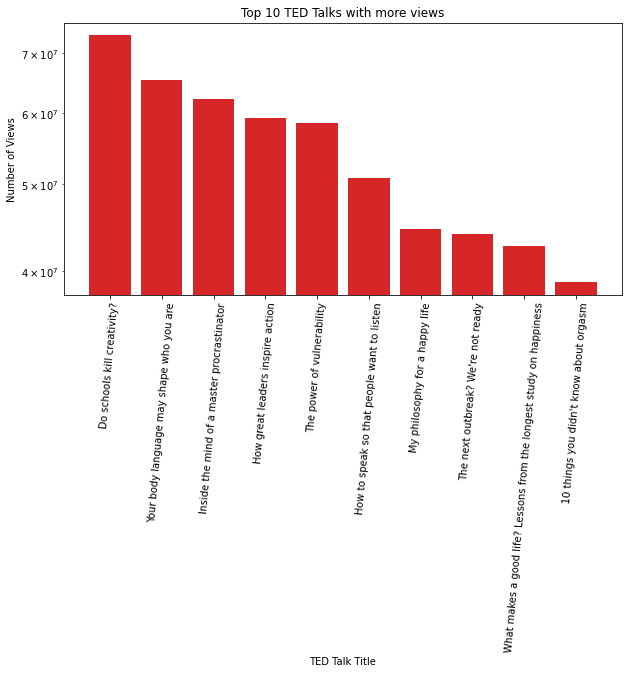

In [78]:
plt.figure(figsize=(10, 5))
plt.bar(most_viewed_talks['title'], most_viewed_talks['views'],color='tab:red')
plt.ylabel('Number of Views')
plt.xlabel('TED Talk Title')
plt.title('Top 10 TED Talks with more views')
plt.yscale("log")
plt.xticks(rotation=85)
plt.show()

##### Top 10 - Most liked TED talks 

In [79]:
most_liked_talks = df[['event_id', 'title', 'duration', 'likes']].sort_values('likes', ascending=False)[:15]
most_liked_talks = most_liked_talks.head(10)
most_liked_talks

,event_id,title,duration,likes
9,66,Do schools kill creativity?,1151,2200000
1308,1569,Your body language may shape who you are,1245,1900000
2482,2458,Inside the mind of a master procrastinator,834,1800000
674,848,How great leaders inspire action,1067,1700000
834,1042,The power of vulnerability,1202,1700000
1936,2034,How to speak so that people want to listen,584,1500000
2189,2225,The next outbreak? We're not ready,503,1300000
3273,13587,My philosophy for a happy life,765,1300000
2423,2399,What makes a good life? Lessons from the longe...,757,1200000
3275,13589,Why people believe they can't draw,904,1100000


Now I will plot the Top 10 most liked TED talks.

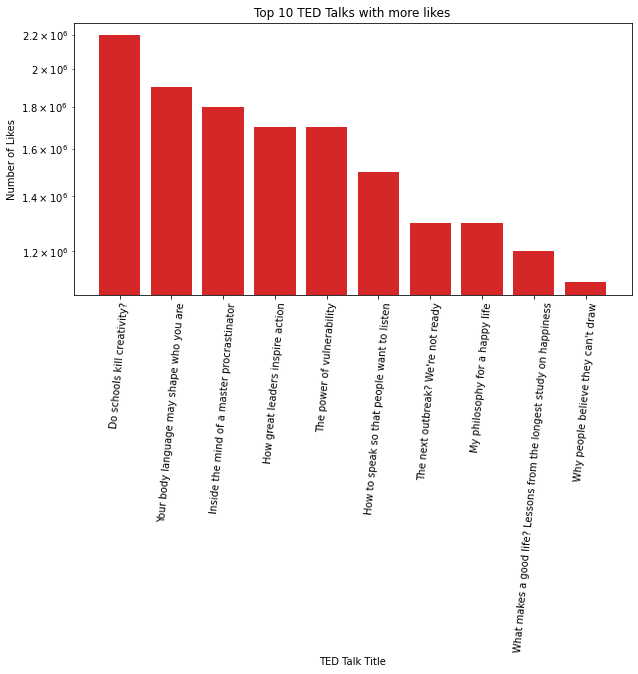

In [80]:
plt.figure(figsize=(10, 5))
plt.bar(most_liked_talks['title'], most_liked_talks['likes'],color='tab:red')
plt.xlabel('TED Talk Title')
plt.ylabel('Number of Likes')
plt.title('Top 10 TED Talks with more likes')
plt.yscale("log")
plt.xticks(rotation=85)
plt.show()

It looks like the top 10 most viewed and most liked are almost the same. Just one difference and the order of one of them changes.

In [81]:
most_pop_event = df[['ted_event','views']].sort_values('views', ascending=False)[:10]
most_pop_event

,ted_event,views
9,TED2006,73389142
1308,TEDGlobal 2012,65331931
2482,TED2016,62253756
674,TEDxPuget Sound,59273210
834,TEDxHouston,58566923
1936,TEDGlobal 2013,50793260
3273,TEDxMidAtlantic 2013,44560660
2189,TED2015,44071656
2423,TEDxBeaconStreet,42700299
449,TED2009,38901968


I will plot the Top 10 TED Event to better visualize.

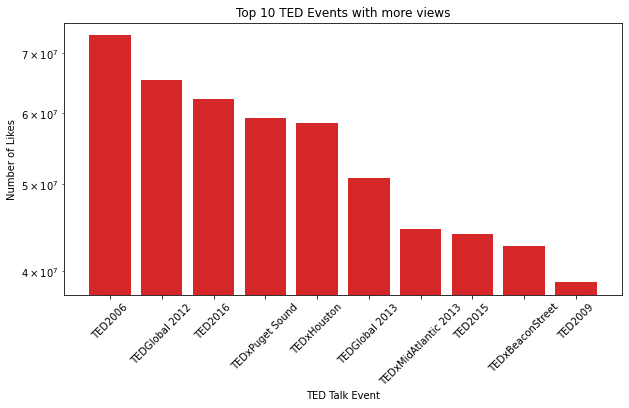

In [82]:
plt.figure(figsize=(10, 5))
plt.bar(most_pop_event['ted_event'], most_pop_event['views'],color='tab:red')
plt.xlabel('TED Talk Event')
plt.ylabel('Number of Likes')
plt.title('Top 10 TED Events with more views')
plt.yscale("log")
plt.xticks(rotation=45)
plt.show()

TED 2006 and TED Global 2012 are the two events with most of the views.

In [83]:
year_most_talks = df['published_year'].value_counts().sort_values(ascending=False)
pd.DataFrame(year_most_talks)

,published_year
2019,826
2018,719
2020,665
2021,460
2017,377
2012,306
2011,260
2010,254
2013,243
2022,243


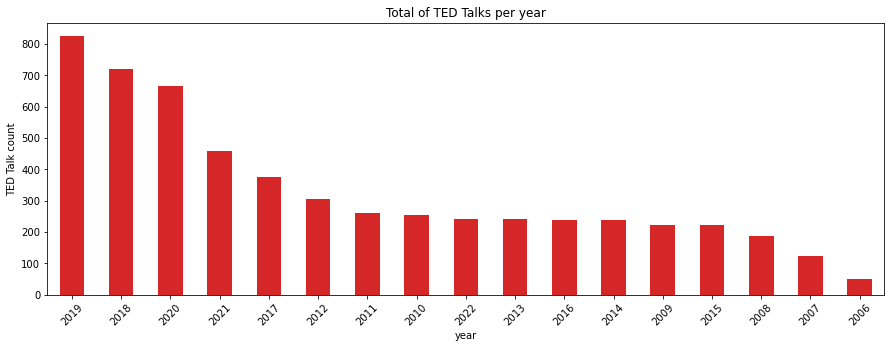

In [84]:
plt.figure(figsize=(15, 5))
df['published_year'].value_counts().plot(kind='bar', color=['tab:red'])
plt.ylabel('TED Talk count')
plt.xlabel('year')
plt.title('Total of TED Talks per year')
plt.xticks(rotation=45)
plt.show()

As it is possible to observe, 2019 and 2018 are the years with the most TED Talks since 2006.

In [85]:
# Geting the summary stats for numeric columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
event_id,5630.0,2.567429e+04,2.963731e+04,1.0,1642.25,9794.0,50004.00,95714.0
duration,5630.0,7.077776e+02,5.211856e+02,60.0,355.00,682.0,926.75,20404.0
likes,5630.0,6.337398e+04,1.089067e+05,17.0,20000.00,41000.0,65000.00,2200000.0
views,5630.0,2.130771e+06,3.679699e+06,587.0,678755.25,1392235.5,2183246.25,73389142.0
recorded_month,5630.0,6.514920e+00,3.436665e+00,1.0,3.00,6.0,10.00,12.0
recorded_year,5630.0,2.015229e+03,4.576474e+00,1972.0,2012.00,2016.0,2019.00,2022.0
published_month,5630.0,6.215098e+00,3.460420e+00,1.0,3.00,6.0,9.00,12.0
published_year,5630.0,2.016108e+03,4.277079e+00,2006.0,2013.00,2018.0,2019.00,2022.0
count_related_videos,5630.0,5.746714e+00,8.377755e-01,1.0,6.00,6.0,6.00,6.0
count_subtitle_languages,5630.0,2.180746e+01,1.156889e+01,1.0,16.00,23.0,29.00,75.0


Standard deviation tells us about the variability of values in the dataset. As we could see, the Std is very small for the columns, which means that the data is close to the mean value.

I will use a histogram to see the distribution of `duration`, `likes` and `views` columns with the mean and median.

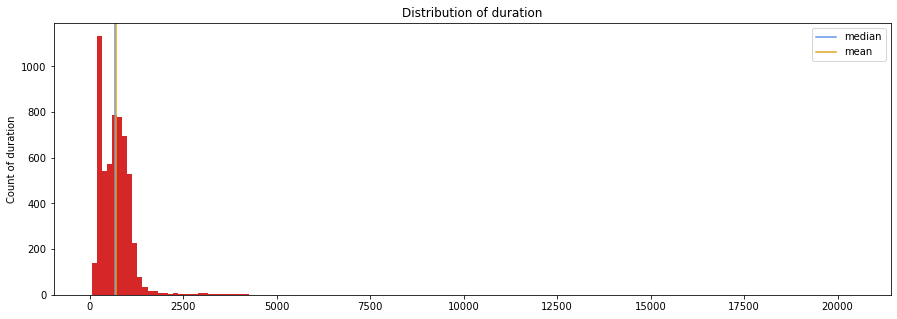

In [86]:
plt.figure(figsize=(15, 5))

plt.hist(df['duration'], bins=150, color='tab:red')

# Overplot mean and median ages
plt.axvline(df['duration'].median(), color='cornflowerblue', label='median')
plt.axvline(df['duration'].mean(), color='goldenrod', label='mean')


plt.title('Distribution of duration')
plt.ylabel('Count of duration')
plt.legend()

plt.show()

By looking at the above graphic, if the first peak is ignored, the distribution of the talk duration appears to be normal ish.

The median and mean are located very close to each other in the middle of the distribution.

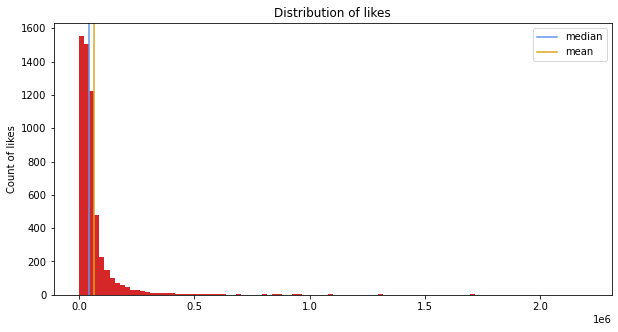

In [87]:
plt.figure(figsize=(10, 5))

plt.hist(df['likes'], bins=100, color='tab:red')

# Overplot mean and median ages
plt.axvline(df['likes'].median(), color='cornflowerblue', label='median')
plt.axvline(df['likes'].mean(), color='goldenrod', label='mean')


plt.title('Distribution of likes')
plt.ylabel('Count of likes')
plt.legend()

plt.show()

The distribution of likes appears to be more of a right-skewed type distribution. The median would look to be close to the peak of the distribution. While the mean would be closer to the lower side.

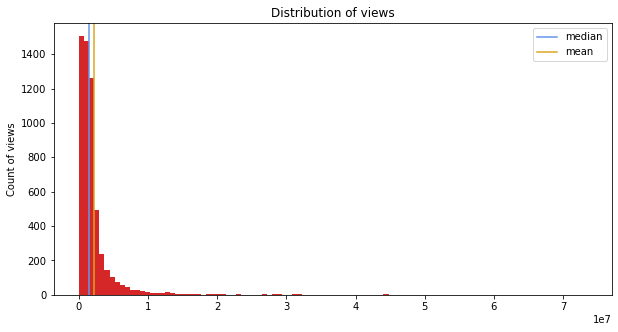

In [88]:
plt.figure(figsize=(10, 5))

plt.hist(df['views'], bins=100, color='tab:red')

# Overplot mean and median ages
plt.axvline(df['views'].median(), color='cornflowerblue', label='median')
plt.axvline(df['views'].mean(), color='goldenrod', label='mean')


plt.title('Distribution of views')
plt.ylabel('Count of views')
plt.legend()

plt.show()

The distribution of views is very similar to the number of likes distribution. It also appears to be more of a right-skewed type distribution. The median would look to be close to the peak of the distribution. While the mean would be closer to the lower side.

Now that I have checked the distribution of some of the numeric columns, I will check the covariance and correlation between these columns.

In [89]:
df.cov()

,event_id,duration,likes,views,recorded_month,recorded_year,published_month,published_year,count_related_videos,count_subtitle_languages,count_topics
event_id,8.783701e+08,-1.358472e+06,-4.285663e+08,-1.439462e+10,1.438790e+04,1.037719e+05,-401.322593,9.938032e+04,-1809.802579,-1.671175e+05,-2549.978609
duration,-1.358472e+06,2.716345e+05,1.877124e+06,6.319791e+07,-4.998496e+01,-3.778300e+02,33.985842,-3.990011e+02,-5.908352,-1.039494e+03,60.351311
likes,-4.285663e+08,1.877124e+06,1.186067e+10,4.006633e+11,-3.099196e+04,-4.370863e+04,-14314.845666,-4.353541e+04,13354.478296,4.544301e+05,23447.160603
views,-1.439462e+10,6.319791e+07,4.006633e+11,1.354019e+13,-1.036454e+06,-1.471918e+06,-477708.666053,-1.467790e+06,448376.964602,1.526725e+07,789358.499561
recorded_month,1.438790e+04,-4.998496e+01,-3.099196e+04,-1.036454e+06,1.181067e+01,3.018965e+00,1.300308,3.565010e+00,-0.431289,-9.159678e+00,-0.298440
recorded_year,1.037719e+05,-3.778300e+02,-4.370863e+04,-1.471918e+06,3.018965e+00,2.094411e+01,0.237080,1.808135e+01,-0.424989,-2.231473e+01,1.739499
published_month,-4.013226e+02,3.398584e+01,-1.431485e+04,-4.777087e+05,1.300308e+00,2.370801e-01,11.974510,-1.269065e+00,0.037969,1.051991e-01,-0.272480
published_year,9.938032e+04,-3.990011e+02,-4.353541e+04,-1.467790e+06,3.565010e+00,1.808135e+01,-1.269065,1.829340e+01,-0.594467,-2.543971e+01,1.247051
count_related_videos,-1.809803e+03,-5.908352e+00,1.335448e+04,4.483770e+05,-4.312887e-01,-4.249886e-01,0.037969,-5.944671e-01,0.701868,4.505319e+00,0.686300
count_subtitle_languages,-1.671175e+05,-1.039494e+03,4.544301e+05,1.526725e+07,-9.159678e+00,-2.231473e+01,0.105199,-2.543971e+01,4.505319,1.338393e+02,6.438034


As we can see, the number of `likes` presented positive covariance with `duration`,  number of `views`, `count_related_videos`, `count_subtitle_languages` and `count_topics` which means there are directly proportional.

Now I will run `The Correlation Matrix`. This number will be between 1 and -1, where 1 represents a perfect relationship and -1 perfect relationship with negative scope.

In [90]:
df.corr()

,event_id,duration,likes,views,recorded_month,recorded_year,published_month,published_year,count_related_videos,count_subtitle_languages,count_topics
event_id,1.000000,-0.087947,-0.132778,-0.131992,0.141261,0.765086,-0.003913,0.783997,-0.072889,-0.487407,-0.025127
duration,-0.087947,1.000000,0.033071,0.032953,-0.027907,-0.158407,0.018844,-0.178992,-0.013532,-0.172400,0.033817
likes,-0.132778,0.033071,1.000000,0.999799,-0.082805,-0.087696,-0.037984,-0.093463,0.146367,0.360679,0.062874
views,-0.131992,0.032953,0.999799,1.000000,-0.081960,-0.087406,-0.037516,-0.093262,0.145447,0.358638,0.062647
recorded_month,0.141261,-0.027907,-0.082805,-0.081960,1.000000,0.191951,0.109340,0.242536,-0.149797,-0.230383,-0.025361
recorded_year,0.765086,-0.158407,-0.087696,-0.087406,0.191951,1.000000,0.014970,0.923746,-0.110846,-0.421472,0.111002
published_month,-0.003913,0.018844,-0.037984,-0.037516,0.109340,0.014970,1.000000,-0.085745,0.013097,0.002628,-0.022996
published_year,0.783997,-0.178992,-0.093463,-0.093262,0.242536,0.923746,-0.085745,1.000000,-0.165902,-0.514130,0.085148
count_related_videos,-0.072889,-0.013532,0.146367,0.145447,-0.149797,-0.110846,0.013097,-0.165902,1.000000,0.464843,0.239235
count_subtitle_languages,-0.487407,-0.172400,0.360679,0.358638,-0.230383,-0.421472,0.002628,-0.514130,0.464843,1.000000,0.162517


Below, I will show the correlation in a heat map in order to have a better visualization.

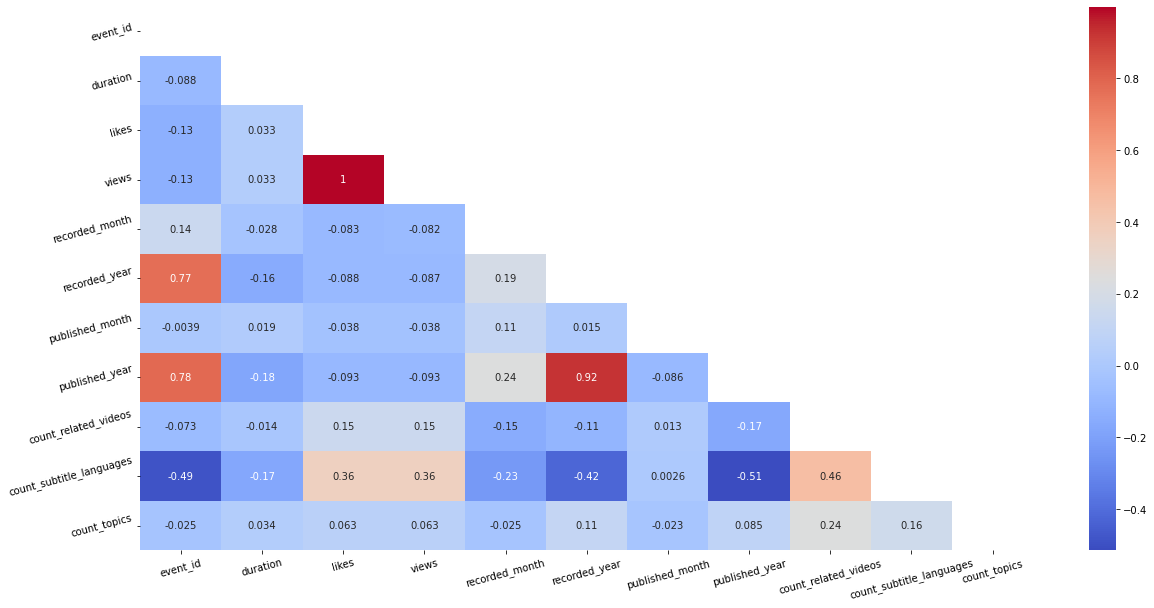

In [91]:
plt.figure(figsize=(20,10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix, cmap='coolwarm')
plt.xticks(rotation=15)
plt.yticks(rotation=15)
plt.show()

We are able to conclude that the correlations are not statistically significant for most of the features because they are smaller than 0.30. However, some columns presented high correlation.

Columns with high correlation:

- `count_subtitle_languages` and `event_id` -> -0.49

- `published_year` and `event_id` -> 0.78

- `recoded_year` and `event_id` -> 0.77

- `views` and `like` -> 1

- `published_year` and `recoded_year` -> 0.92

- `count_subtitle_languages` and `published_year` -> -0.51

Since `event_id` is correlated to different  columns, I will drop it.

In [92]:
df.drop('event_id', axis=1, inplace=True)

In [93]:
# Checking if the drop worked

df.head(1)

,duration,ted_event,likes,page_url,speaker_information,description,title,views,recorded_month,recorded_year,published_month,published_year,count_related_videos,count_subtitle_languages,count_topics
0,992,TED2006,17000,https://www.ted.com/talks/mena_trott_meet_the_...,"[{""name"":""Mena Trott"",""occupation"":""Blogger; c...","The founding mother of the blog revolution, Mo...",Meet the founder of the blog revolution,589115,2,2006,8,2006,6,21,8


I will check the correlation after dropping the column `event_id`.

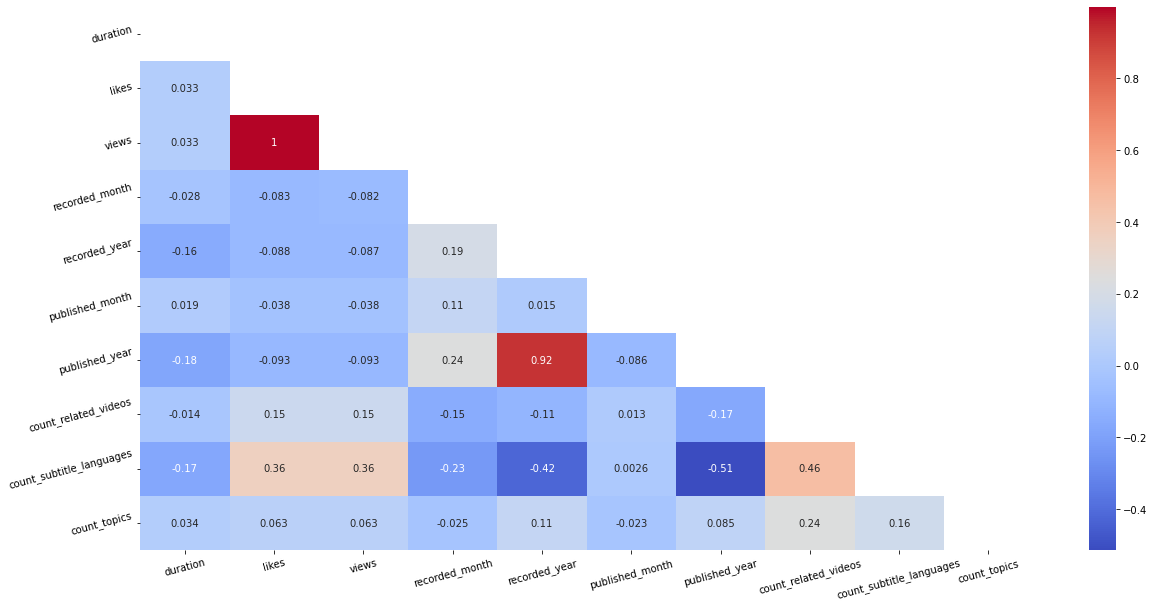

In [94]:
plt.figure(figsize=(20,10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix, cmap='coolwarm')
plt.xticks(rotation=15)
plt.yticks(rotation=15)
plt.show()

Now, I will drop the column `recorded_year`

In [95]:
df.drop('recorded_year', axis=1, inplace=True)

In [96]:
# Checking if the drop worked

df.head(1)

,duration,ted_event,likes,page_url,speaker_information,description,title,views,recorded_month,published_month,published_year,count_related_videos,count_subtitle_languages,count_topics
0,992,TED2006,17000,https://www.ted.com/talks/mena_trott_meet_the_...,"[{""name"":""Mena Trott"",""occupation"":""Blogger; c...","The founding mother of the blog revolution, Mo...",Meet the founder of the blog revolution,589115,2,8,2006,6,21,8


I will check the correlation after dropping the column `event_id`.

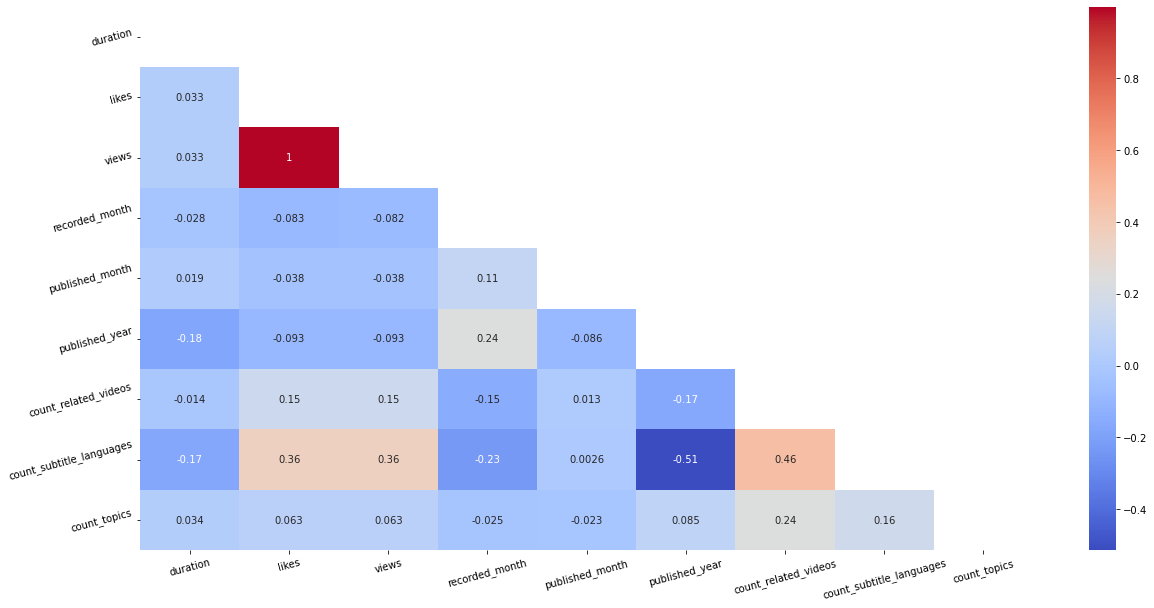

In [97]:
plt.figure(figsize=(20,10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix, cmap='coolwarm')
plt.xticks(rotation=15)
plt.yticks(rotation=15)
plt.show()

As expected, `likes` and `views` are very correlated. So, I will create a new feature using both columns to measure the popularity of the TED talk.

I will calculate the ratio and then drop the `likes` column. I chose to keep the number of `views` column because even when considering the engagement rate, the total number of likes is very important; however, to increase the number of likes, getting views is the main concept that leads to increased likes

In [98]:
df['popularity_ratio'] = df['likes']*100/df['views']

In [99]:
df.head()

,duration,ted_event,likes,page_url,speaker_information,description,title,views,recorded_month,published_month,published_year,count_related_videos,count_subtitle_languages,count_topics,popularity_ratio
0,992,TED2006,17000,https://www.ted.com/talks/mena_trott_meet_the_...,"[{""name"":""Mena Trott"",""occupation"":""Blogger; c...","The founding mother of the blog revolution, Mo...",Meet the founder of the blog revolution,589115,2,8,2006,6,21,8,2.885684
1,957,TED2006,110000,https://www.ted.com/talks/al_gore_averting_the...,"[{""name"":""Al Gore"",""occupation"":""Climate advoc...",With the same humor and humanity he exuded in ...,Averting the climate crisis,3671801,2,6,2006,6,43,9,2.995805
2,1266,TED2006,60000,https://www.ted.com/talks/david_pogue_simplici...,"[{""name"":""David Pogue"",""occupation"":""Technolog...",New York Times columnist David Pogue takes aim...,Simplicity sells,2008487,2,6,2006,6,27,8,2.987323
3,1126,TEDGlobal 2005,80000,https://www.ted.com/talks/david_deutsch_chemic...,"[{""name"":""David Deutsch"",""occupation"":""Physici...",Legendary scientist David Deutsch puts theoret...,Chemical scum that dream of distant quasars,2694257,7,9,2006,6,29,8,2.969279
4,1524,TED2006,14000,https://www.ted.com/talks/jehane_noujaim_my_wi...,"[{""name"":""Jehane Noujaim"",""occupation"":""Filmma...",Jehane Noujaim unveils her 2006 TED Prize wish...,My wish: A global day of film,489757,2,7,2006,6,20,8,2.858560


In [100]:
pd.DataFrame(df['popularity_ratio'].describe().T)

,popularity_ratio
count,5630.000000
mean,2.961598
std,0.040608
min,2.740327
25%,2.948893
50%,2.973532
75%,2.989806
max,3.000000


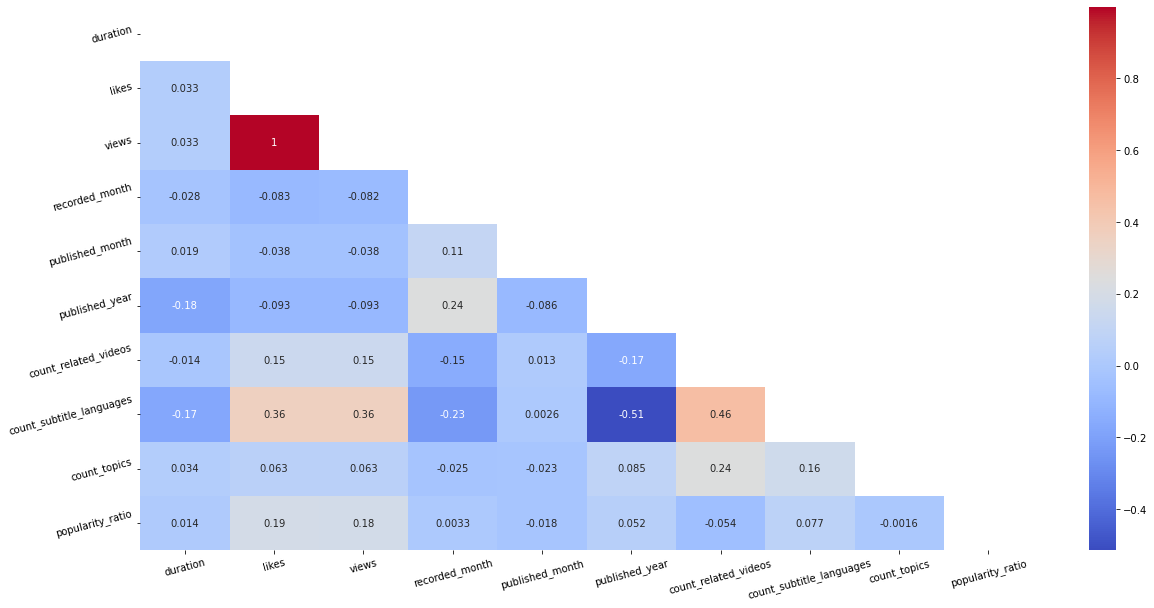

In [101]:
plt.figure(figsize=(20,10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix, cmap='coolwarm')
plt.xticks(rotation=15)
plt.yticks(rotation=15)
plt.show()

Now, after checking that the new column `popularity_ratio` does not have any correlation with the other columns, I will drop the number of `likes` as I mentioned before.

In [102]:
df.drop('likes', axis=1, inplace=True)

In [103]:
# Checking if drop worked

df.head(1)

,duration,ted_event,page_url,speaker_information,description,title,views,recorded_month,published_month,published_year,count_related_videos,count_subtitle_languages,count_topics,popularity_ratio
0,992,TED2006,https://www.ted.com/talks/mena_trott_meet_the_...,"[{""name"":""Mena Trott"",""occupation"":""Blogger; c...","The founding mother of the blog revolution, Mo...",Meet the founder of the blog revolution,589115,2,8,2006,6,21,8,2.885684


Since `count_subtitle_languages` and `published_year` presented correlation of -0.51,  I will plot to understand this correlation.

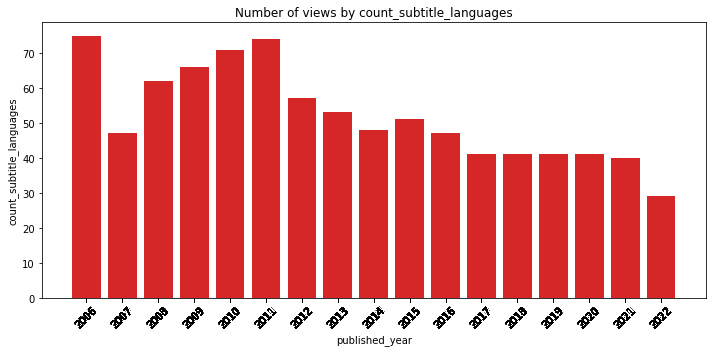

In [104]:
plt.figure(figsize=(10,5))

plt.bar(df['published_year'],df['count_subtitle_languages'], color='tab:red')


plt.title("Number of views by count_subtitle_languages")
plt.xlabel("published_year")
plt.ylabel('count_subtitle_languages')
plt.xticks(df['published_year'],rotation=45)

plt.tight_layout()

plt.show()

I do not see any relation, so, for now, I will keep `count_subtitle_languages` and `published_year` even though they presented 0.51 correlation.

##### Now that we understand the covariance and correlation between the numerical variables, I will check the correlation between the number of `views` and `popularity_ratio` with some of the categorical variables.



- Checking the correlation between the number of `views` with the size of the description.

So, I will transform the `description` column to numerical to check for any relation.

In [105]:
df['description']

0       The founding mother of the blog revolution, Mo...
1       With the same humor and humanity he exuded in ...
2       New York Times columnist David Pogue takes aim...
3       Legendary scientist David Deutsch puts theoret...
4       Jehane Noujaim unveils her 2006 TED Prize wish...
                              ...                        
5626    In 2020, Mali produced over 71 tons of gold— a...
5627    Forget home economics and standardized tests, ...
5628    What if the commonly accepted narratives about...
5629    Your closet is likely full of all kinds of mat...
5630    Could DAOs, or "decentralized autonomous organ...
Name: description, Length: 5630, dtype: object

In [106]:
df['description_wc'] = df['description'].str.count('')+1

In [107]:
df['description_wc'] = np.where(df['description']=='',0,df['description_wc'])

In [108]:
# Checking if the count for the `description` worked

print(df['description_wc'])

0       252
1       235
2       204
3       232
4       123
       ... 
5626    486
5627    372
5628    418
5629    496
5630    557
Name: description_wc, Length: 5630, dtype: int64


In [109]:
# Using a new dataframe

relationship_length = df[['views', 'description_wc', 'popularity_ratio', 'duration']]
relationship_length

,views,description_wc,popularity_ratio,duration
0,589115,252,2.885684,992
1,3671801,235,2.995805,957
2,2008487,204,2.987323,1266
3,2694257,232,2.969279,1126
4,489757,123,2.858560,1524
...,...,...,...,...
5626,195168,486,2.971799,278
5627,356620,372,2.804105,940
5628,412825,418,2.906801,1048
5629,240375,496,2.995320,651


In [110]:
relationship_length.describe().T

,count,mean,std,min,25%,50%,75%,max
views,5630.0,2.130771e+06,3.679699e+06,587.000000,678755.250000,1.392236e+06,2.183246e+06,73389142.0
description_wc,5630.0,3.713096e+02,1.208674e+02,25.000000,277.000000,3.690000e+02,4.580000e+02,1339.0
popularity_ratio,5630.0,2.961598e+00,4.060772e-02,2.740327,2.948893,2.973532e+00,2.989806e+00,3.0
duration,5630.0,7.077776e+02,5.211856e+02,60.000000,355.000000,6.820000e+02,9.267500e+02,20404.0


In [111]:
relationship_length.corr()

,views,description_wc,popularity_ratio,duration
views,1.000000,-0.001973,0.180127,0.032953
description_wc,-0.001973,1.000000,0.061747,0.006377
popularity_ratio,0.180127,0.061747,1.000000,0.013513
duration,0.032953,0.006377,0.013513,1.000000


Just using the correlation matrix, it is possible to see that there is no relationship between `views` with description length, but it showed a small positive relation with `popularity_ratio` and `duration`.

I will use a scatter plot to double check if there is any relationship between number of views and length of description.

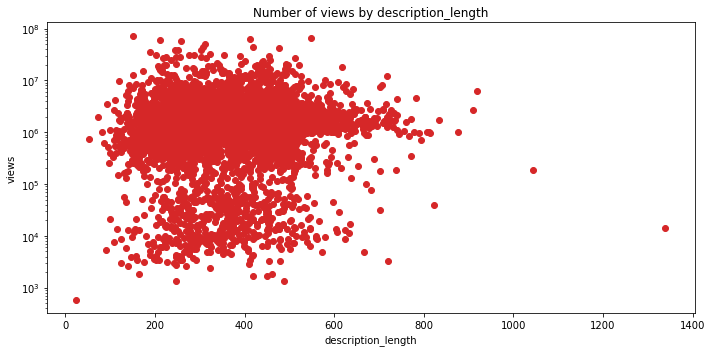

In [112]:
plt.figure(figsize=(10,5))

plt.scatter(relationship_length['description_wc'],relationship_length['views'], color='tab:red')

plt.yscale('log')


plt.title("Number of views by description_length")
plt.xlabel("description_length")
plt.ylabel('views')

plt.tight_layout()

plt.show()

By observing the graphic above, it appears that the number of views does not change according to the length of the description.

The number of views has a big concentration in between ~150 to ~600 of the description length, but it does not increase or decrease accordingly to the increment of words.

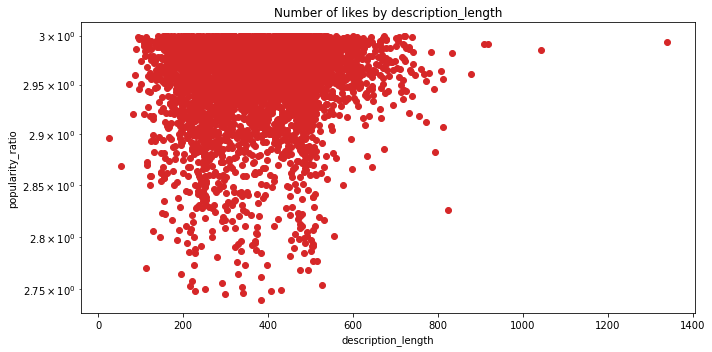

In [113]:
plt.figure(figsize=(10,5))

plt.scatter(relationship_length['description_wc'],relationship_length['popularity_ratio'], color='tab:red')

plt.yscale('log')


plt.title("Number of likes by description_length")
plt.xlabel("description_length")
plt.ylabel('popularity_ratio')

plt.tight_layout()

plt.show()

The visualization of popularity_ratio and description length is pretty similar to the number of views and description length. Which means that also there is no relationship between the length of the description to the popularity_ratio.

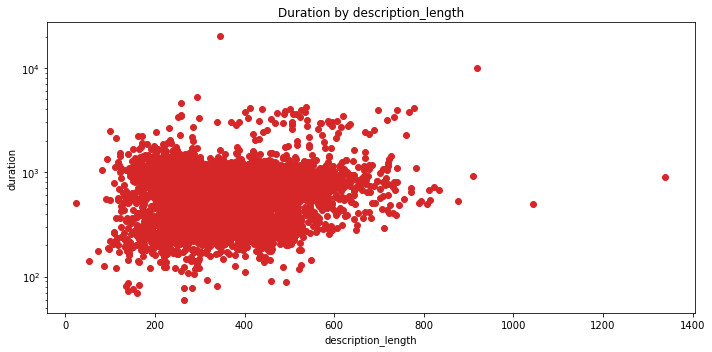

In [114]:
plt.figure(figsize=(10,5))

plt.scatter(relationship_length['description_wc'],relationship_length['duration'], color='tab:red')


plt.yscale('log')


plt.title("Duration by description_length")
plt.xlabel("description_length")
plt.ylabel('duration')

plt.tight_layout()

plt.show()

As we can see the duration does not have a relationship with the length of the description.

Now, I will drop `description_wc` to not interfere in the further analyse:

In [115]:
df.drop('description_wc', axis=1, inplace=True)

###### Now, I would like to see the relation between `count_related_videos`,	`count_subtitle_languages`,	`count_topics`, with `popularity_ratio` and `views`.

I will use the original dataframe

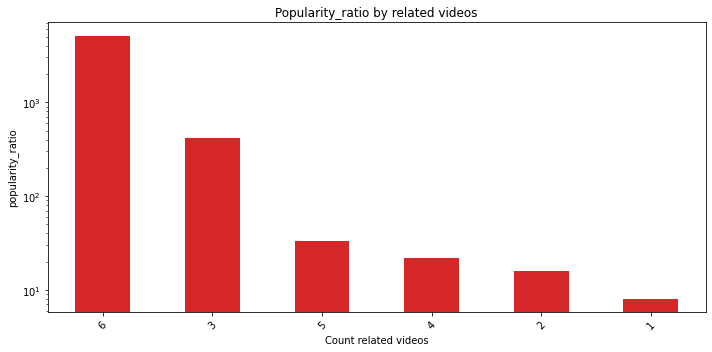

In [116]:
plt.figure(figsize=(10,5))

df['popularity_ratio'].value_counts(),df['count_related_videos'].value_counts().plot(kind='bar', color='tab:red')

plt.yscale('log')
plt.title("Popularity_ratio by related videos")
plt.xlabel("Count related videos")
plt.ylabel('popularity_ratio')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

As we can see, the higher the number of related videos, the higher is the popularity of the TED talk.

We could say the opposite for the talks with a small count of related videos, where the smaller the count, the lesser the popularity ratio

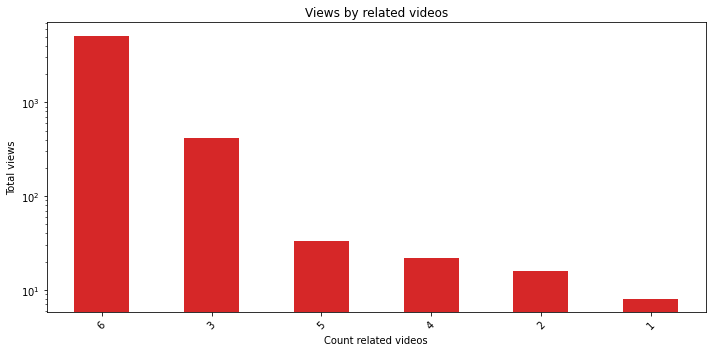

In [117]:
plt.figure(figsize=(10,5))

df['views'].value_counts(),df['count_related_videos'].value_counts().plot(kind='bar', color='tab:red')

plt.yscale('log')
plt.title("Views by related videos")
plt.xlabel("Count related videos")
plt.ylabel('Total views')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

As expected, the number of related videos also impact the number of views.

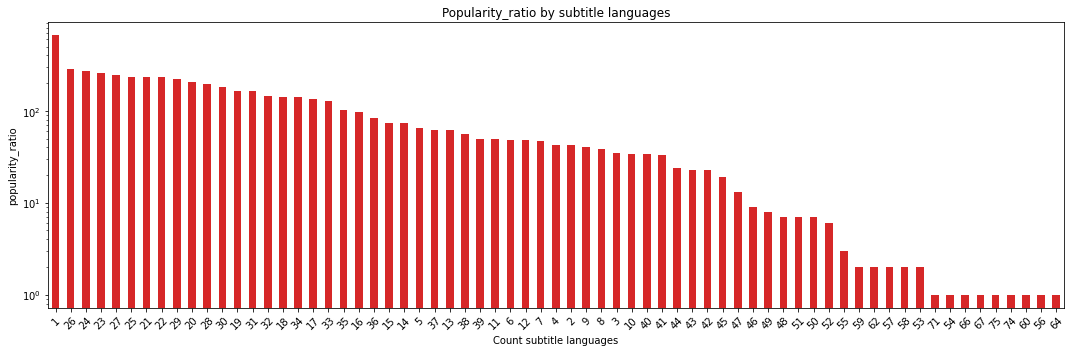

In [118]:
plt.figure(figsize=(15,5))

df['popularity_ratio'].value_counts(),df['count_subtitle_languages'].value_counts().plot(kind='bar', color='tab:red')

plt.yscale('log')
plt.title("Popularity_ratio by subtitle languages")
plt.xlabel("Count subtitle languages")
plt.ylabel('popularity_ratio')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

As it shows above, some of the talks with large amounts of subtitle languages did not present very good popularity.

It would need a further investigation to understand if they have a specific language that is not impacting their popularity.

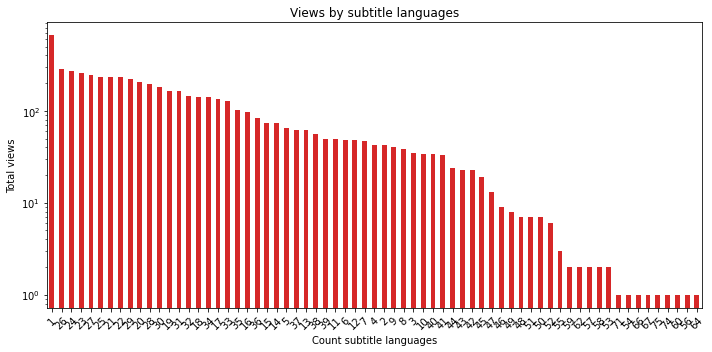

In [119]:
plt.figure(figsize=(10,5))

df['views'].value_counts(),df['count_subtitle_languages'].value_counts().plot(kind='bar', color='tab:red')

plt.yscale('log')
plt.title("Views by subtitle languages")
plt.xlabel("Count subtitle languages")
plt.ylabel('Total views')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

I would say the same here. Some of the talks with a great deal of subtitles do not have a high number of views.

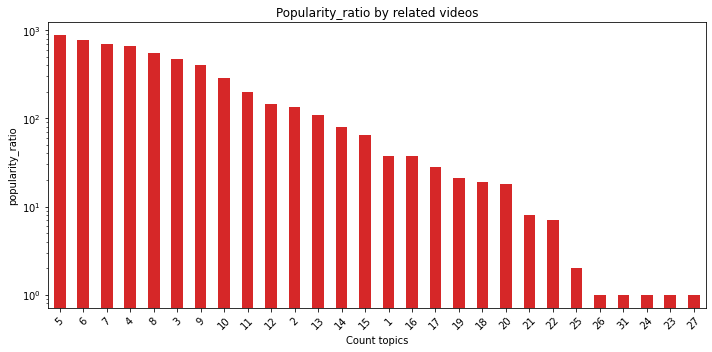

In [120]:
plt.figure(figsize=(10,5))

df['popularity_ratio'].value_counts(),df['count_topics'].value_counts().plot(kind='bar', color='tab:red')

plt.yscale('log')
plt.title("Popularity_ratio by related videos")
plt.xlabel("Count topics")
plt.ylabel('popularity_ratio')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

We can see that the most popular TED talks are between 3 to 10 topics. 

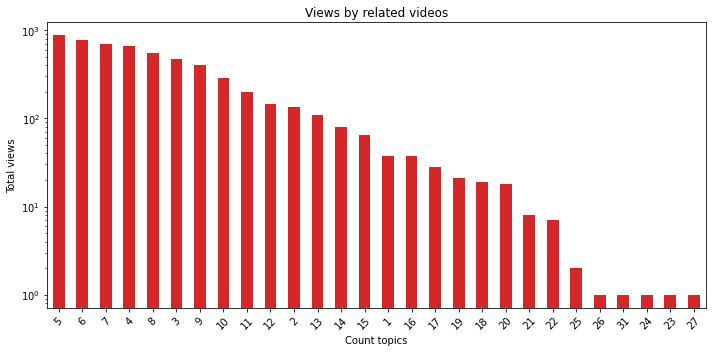

In [121]:
plt.figure(figsize=(10,5))

df['views'].value_counts(),df['count_topics'].value_counts().plot(kind='bar', color='tab:red')

plt.yscale('log')
plt.title("Views by related videos")
plt.xlabel("Count topics")
plt.ylabel('Total views')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

The number of views showed the same range (3 to 10) of number of topics that influences it.

In [122]:
# Checking if drop worked

df.head(1)

,duration,ted_event,page_url,speaker_information,description,title,views,recorded_month,published_month,published_year,count_related_videos,count_subtitle_languages,count_topics,popularity_ratio
0,992,TED2006,https://www.ted.com/talks/mena_trott_meet_the_...,"[{""name"":""Mena Trott"",""occupation"":""Blogger; c...","The founding mother of the blog revolution, Mo...",Meet the founder of the blog revolution,589115,2,8,2006,6,21,8,2.885684


In [123]:
df.shape

(5630, 14)

Now that I have completed the data cleaning and the EDA, I will save this cleaned data as `talks_info_clean_description.csv` and then continue in the next notebook.

Therefore, in the next notebook, you will find the modeling part where I will use Bag of Words and then I will apply Logistic Regression, KNN and Decision Trees and check how these models perform.

In [124]:
# Saving the modified df to csv files to use with the modeling and RNN

df.to_csv('talks_info_clean.csv', index=False)

### Conclusion

As we could observe from the above analysis, this data frame presented a few problems related to missing values and columns in list format.

Moreover, in the beginning of the notebook, I renamed the columns, and it helped in the identification of the information. One thing worth pointing out is that without any modification, the data frame had 5631 rows and 16 features and now, even after all the modifications, the new data frame has 14 features and just one line shorter.

Therefore, as I mentioned in the introduction, the modeling part you will find in the notebook called `Notebook_2_Modeling_TED_talk`. I did not use any specific conda environment for the modeling part.

Please, download the new csv file from the above code because I used this new one for the next part.